In [1]:
import os
#import_librariesa
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_colwidth", None)
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
os.chdir(r'E:\AnalyticsVidhya\Hackathon+DataSet\HR Analytics')

In [3]:
train_data = pd.read_csv('train_LZdllcl.csv')
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
train_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [6]:
#To FInd the Unique Values in the Dataframe
train_data.apply(lambda x: (len(x.unique()))) 

employee_id             54808
department                  9
region                     34
education                   4
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        6
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [7]:
bins=[20,35,50,60]
labels = ['Junior','Mid Level','Senior']
train_data['age'] = pd.cut(train_data['age'], bins, labels =labels)

In [8]:
dict_age= ({'Junior':0,'Mid Level':1,'Senior':2})
train_data['age'] = train_data['age'].map(dict_age)

In [9]:
train_data['education'] = train_data['education'].fillna(2)
train_data['age'].fillna(1, inplace = True)

In [10]:
train_data['previous_year_rating'].fillna(1, inplace = True)

In [11]:
dict_gender= ({'f':0,'m':1})
train_data['gender'] = train_data['gender'].map(dict_gender)

In [12]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,0,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,1,other,1,0,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,0,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,1,other,2,1,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,1,other,1,1,3.0,2,0,0,73,0


In [13]:
#data_product_combined = pd.get_dummies(data_combined['Product'])
cs_encoder = pd.DataFrame(train_data['education'])

import category_encoders as ce
# create an object of the OrdinalEncoding
ce_ordinal = ce.OrdinalEncoder(cols=['education'])

# fit and transform and you will get the encoded data
fitdata_products_combined = ce_ordinal.fit_transform(cs_encoder)

In [14]:
train_data.drop(['education'], axis =1, inplace = True)

In [15]:
train_data= pd.concat([train_data,fitdata_products_combined], axis =1)
train_data

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education
0,65438,Sales & Marketing,region_7,0,sourcing,1,0,5.0,8,1,0,49,0,1
1,65141,Operations,region_22,1,other,1,0,5.0,4,0,0,60,0,2
2,7513,Sales & Marketing,region_19,1,sourcing,1,0,3.0,7,0,0,50,0,2
3,2542,Sales & Marketing,region_23,1,other,2,1,1.0,10,0,0,50,0,2
4,48945,Technology,region_26,1,other,1,1,3.0,2,0,0,73,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,1,sourcing,1,1,3.0,17,0,0,78,0,2
54804,74592,Operations,region_27,0,other,1,1,2.0,6,0,0,56,0,1
54805,13918,Analytics,region_1,1,other,1,0,5.0,3,1,0,79,0,2
54806,13614,Sales & Marketing,region_9,1,sourcing,1,0,1.0,2,0,0,45,0,3


In [16]:
dict_recruitment = {'other':0,'sourcing':1,'referred':2}
train_data['recruitment_channel']=train_data['recruitment_channel'].map(dict_recruitment) 

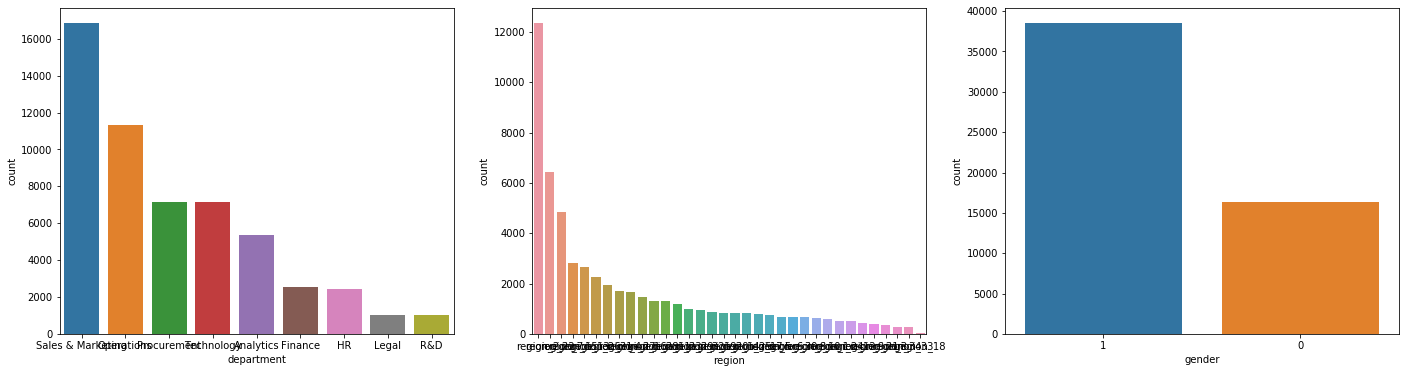

In [17]:
plt.figure(figsize=(24, 6))
plt.subplot(131)
sns.countplot(train_data['department'],order = train_data['department'].value_counts(dropna=False).index)
plt.subplot(132)
sns.countplot(train_data['region'],order = train_data['region'].value_counts(dropna=False).index)
plt.subplot(133)
sns.countplot(train_data['gender'],order = train_data['gender'].value_counts(dropna=False).index)

In [18]:
#KPI completion is considered most importang feature of all

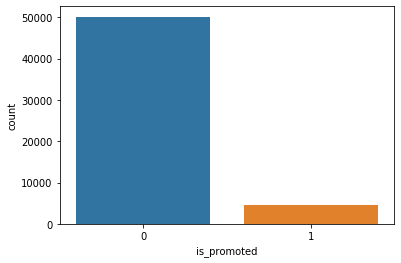

In [19]:
#Target_Variable
sns.countplot(train_data['is_promoted'],order = train_data['is_promoted'].value_counts().index)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = ['department','region']

for i in cat_col:
    train_data[i]= le.fit_transform(train_data[i])
    

In [21]:
train_data['age']=train_data['age'].astype(int)

In [22]:
train_data.columns

Index(['employee_id', 'department', 'region', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'education'],
      dtype='object')

In [23]:
X = train_data.drop(['employee_id', 'is_promoted'], axis =1)
y = train_data['is_promoted']

In [24]:
X.head()

,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education
0,7,31,0,1,1,0,5.0,8,1,0,49,1
1,4,14,1,0,1,0,5.0,4,0,0,60,2
2,7,10,1,1,1,0,3.0,7,0,0,50,2
3,7,15,1,0,2,1,1.0,10,0,0,50,2
4,8,18,1,0,1,1,3.0,2,0,0,73,2


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [27]:
def fit_model(X, y, model_name='lr', model_type=LogisticRegression()):
    
    # Pipeline for pre-processing
    pipe = Pipeline([
        ('scale', StandardScaler()),
        (model_name, model_type)
    ])
    # Fit the model 
    model = pipe.fit(X, y)
    
    #Score
    score = model.score(X, y)
                   
    # Print attributes
    print(f"For model: {model_type}")
#     print(f"Score: {score}")
    
    return model

In [28]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Evaluate training data
    preds_train = model.predict(X_train)
    score_train = model.score(X_train, y_train)

    # Evaluate testing data
    preds_test = model.predict(X_test)
    score_test = model.score(X_test, y_test)
    
    # Print results
    
    print(f'Train Score: {score_train:.4f}')
    print(f'Test Score: {score_test:.4f}')

In [29]:
logreg = fit_model(X_train, y_train, model_name='logreg', model_type=LogisticRegression())

evaluate_model(logreg, X_train, X_test, y_train, y_test)

For model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Train Score: 0.9165
Test Score: 0.9196


In [31]:

dtc = fit_model(X_train, y_train, model_name='dtc', model_type=DecisionTreeClassifier())

evaluate_model(dtc, X_train, X_test, y_train, y_test)

For model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Train Score: 0.9982
Test Score: 0.9002


In [32]:
rf = fit_model(X_train, y_train, model_name='rf', model_type=RandomForestClassifier())

evaluate_model(rf, X_train, X_test, y_train, y_test)

For model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Train Score: 0.9981
Test Score: 0.9345


In [33]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 93.0%


In [34]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Evaluation Metrics

In [35]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[9932,  122],
       [ 646,  262]], dtype=int64)

In [37]:
cr = classification_report(y_test, y_pred)
cr

'              precision    recall  f1-score   support\n\n           0       0.94      0.99      0.96     10054\n           1       0.68      0.29      0.41       908\n\n    accuracy                           0.93     10962\n   macro avg       0.81      0.64      0.68     10962\nweighted avg       0.92      0.93      0.92     10962\n'

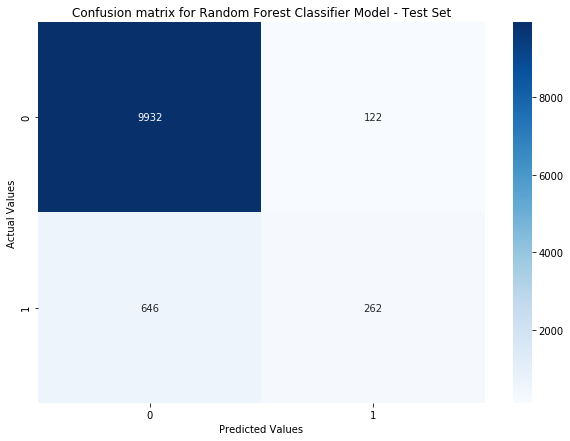

In [36]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [42]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 92.99%


In [43]:
# Creating a confusion matrix for training set
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[40063,    23],
       [  192,  3568]], dtype=int64)

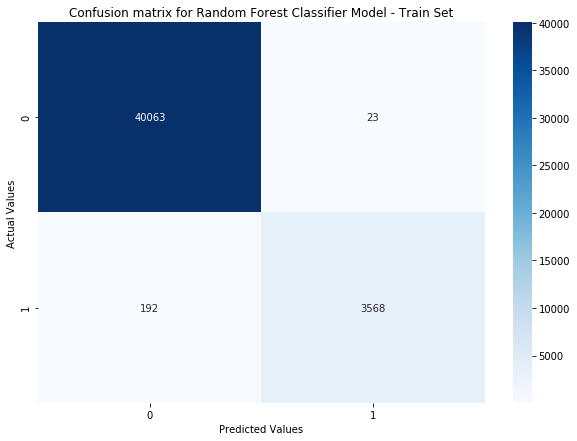

In [44]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [45]:
# Accuracy Score
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 99.51%


In [46]:
# Classification Report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40086
           1       0.99      0.95      0.97      3760

    accuracy                           1.00     43846
   macro avg       0.99      0.97      0.98     43846
weighted avg       1.00      1.00      1.00     43846

